# Capstone Project - Customer Persona Generator
_Author: Chi-Yuan (Tina) Peng_

_Date: Dec. 2022_

## Imports

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

## Load Data

In [36]:
df = pd.read_csv('../data/customer_segmentation_rawdata.csv', sep = '\t')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


#### Take a glance at the data ...

In [37]:
df.shape

(2240, 29)

In [38]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

>Note: There are 24 missing values in the `Income` column.

In [39]:
# drop the 24 observations without income record.
df.dropna(inplace = True)
df.shape

(2216, 29)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   int64 

>Note: There are only 3 categorical variables (`Education`, `Marital_Status`, and `Dt_Customer`) and the rest are numerical variables.

## Data Cleaning

### Categorical Variables
**1. Education:** _Education Qualification of customer_

- Relabel `Education` to **'under_grad'** and **'graduate'**
    - **under_grad:** Graduation, 2n Cycle, Basic
    - **graduate:** PhD, Master

In [41]:
df['Education'].value_counts(normalize = True)

Education
Graduation    0.503610
PhD           0.217058
Master        0.164711
2n Cycle      0.090253
Basic         0.024368
Name: proportion, dtype: float64

In [42]:
df["edu_level"] = df["Education"].replace({"Graduation": 2,
                                           "2n Cycle": 1,
                                           "Basic": 1,
                                           "PhD": 3,
                                           "Master": 3})

C:\Users\shashank.sahoo\AppData\Local\Temp\ipykernel_8756\2073525624.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["edu_level"] = df["Education"].replace({"Graduation": 2,


In [43]:
df['edu_level'].value_counts(normalize = True)

edu_level
2    0.503610
3    0.381769
1    0.114621
Name: proportion, dtype: float64

**2. Marital_Status:** _Marital Status of customer_
- Create a new column called `not_live_alone` with **0** and **1**
    - **1:** Married, Together
    - **0:** All other status

In [44]:
df['Marital_Status'].value_counts(normalize = True)

Marital_Status
Married     0.386733
Together    0.258574
Single      0.212545
Divorced    0.104693
Widow       0.034296
Alone       0.001354
Absurd      0.000903
YOLO        0.000903
Name: proportion, dtype: float64

In [45]:
df["not_live_alone"] = df["Marital_Status"].replace({"Married": 1,
                                                     "Together": 1,
                                                     "Single": 0,
                                                     "Divorced": 0,
                                                     "Widow": 0,
                                                     "Alone": 0,
                                                     "Absurd": 0, 
                                                     "YOLO": 0})

C:\Users\shashank.sahoo\AppData\Local\Temp\ipykernel_8756\3479433738.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["not_live_alone"] = df["Marital_Status"].replace({"Married": 1,


In [46]:
df['not_live_alone'].value_counts(normalize = True)

not_live_alone
1    0.645307
0    0.354693
Name: proportion, dtype: float64

**3. Dt_Customer:** _Date of customer's enrollment with the company_

In [53]:
df["Dt_Customer"]

0       04-09-2012
1       08-03-2014
3       10-02-2014
4       19-01-2014
5       09-09-2013
           ...    
2235    13-06-2013
2236    10-06-2014
2237    25-01-2014
2238    24-01-2014
2239    15-10-2012
Name: Dt_Customer, Length: 2215, dtype: object

In [54]:
df = df.drop(df.index[2])

In [55]:
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], format='%d-%m-%Y')
df["Dt_Customer"].head()

0   2012-09-04
1   2014-03-08
4   2014-01-19
5   2013-09-09
6   2012-11-13
Name: Dt_Customer, dtype: datetime64[ns]

### Numerical Variables

**1. Year_Birth:**
- Create a new column called `Age` by subtracting the `Year_Birth` from current year.

In [56]:
df['age'] = datetime.date.today().year - df['Year_Birth']
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,edu_level,not_live_alone,age
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,3,11,1,2,0,67
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,3,11,0,2,0,70
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,3,11,0,3,1,43
5,7446,1967,Master,Together,62513.0,0,1,2013-09-09,16,520,...,0,0,0,0,3,11,0,3,1,57
6,965,1971,Graduation,Divorced,55635.0,0,1,2012-11-13,34,235,...,0,0,0,0,3,11,0,2,0,53


In [57]:
df = df[df['age'] <= 90]
df[['age']].describe()

,age
count,2211.000000
mean,55.087743
std,11.700814
min,28.000000
25%,47.000000
50%,54.000000
75%,65.000000
max,84.000000


> Removed 3 observations whose age are over 90.

**2. Income:**

In [58]:
df = df[df['Income'] <= 500_000]
df[['Income']].describe()

,Income
count,2210.000000
mean,51961.371041
std,21526.225352
min,1730.000000
25%,35265.000000
50%,51371.000000
75%,68480.750000
max,162397.000000


> Removed 1 observation whose annual income is over 500,000.

**3. Kidhome and Teenhome:**
- Create a new column called `num_child` to add these 2 columns together.
- Create a new column called `has_child` to describe if this customer has any child.
- Create a new column called `num_family_member` to add `not_live_alone` and `num_child` together.
- Create a new column called `single_parent` to describe if this customer is single parenting (has at least one kid and is living without a partner).

In [59]:
df['Kidhome'].value_counts()

Kidhome
0    1280
1     884
2      46
Name: count, dtype: int64

In [60]:
df['Teenhome'].value_counts()

Teenhome
0    1142
1    1017
2      51
Name: count, dtype: int64

In [61]:
df['num_child'] = df['Kidhome'] + df['Teenhome']
df['num_child'].value_counts()

num_child
1    1113
0     631
2     416
3      50
Name: count, dtype: int64

In [62]:
df['has_child'] = np.where(df['num_child'] != 0, 1, 0)
df['has_child'].value_counts()

has_child
1    1579
0     631
Name: count, dtype: int64

In [63]:
df['num_family_member'] = df['num_child'] + df['not_live_alone']
df['num_family_member'].value_counts()

num_family_member
2    878
1    753
3    296
0    252
4     31
Name: count, dtype: int64

In [64]:
df['single_parent'] = np.where((df['has_child'] == 1) & (df["not_live_alone"] == 0), 1, 0)
df['single_parent'].value_counts()

single_parent
0    1678
1     532
Name: count, dtype: int64

**4. Amount Spent on Products**
- Create a new column called `total_spent` to record the totall amount the customer spent in the store.

In [65]:
df.filter(regex = '^Mnt', axis = 1).describe()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
count,2210.000000,2210.000000,2210.000000,2210.000000,2210.000000,2210.000000
mean,305.366063,26.329412,167.114480,37.628054,27.060181,43.944344
std,337.407734,39.756275,224.332546,54.771430,41.106201,51.723733
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000
50%,175.500000,8.000000,68.000000,12.000000,8.000000,24.500000
75%,505.000000,33.000000,232.750000,50.000000,33.000000,56.000000
max,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000


In [66]:
df['total_spent'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df[['total_spent']].describe()

,total_spent
count,2210.000000
mean,607.442534
std,602.659968
min,5.000000
25%,69.000000
50%,397.000000
75%,1048.000000
max,2525.000000


**5. Percentage Spent on Different Products**
- Create 6 new columns each calculating the percentage of the amount the customer spent on each type of products.

In [67]:
df['PrWines'] = df['MntWines'] / df['total_spent']
df['PrFruits'] = df['MntFruits'] / df['total_spent']
df['PrMeatProducts'] = df['MntMeatProducts'] / df['total_spent']
df['PrFishProducts'] = df['MntFishProducts'] / df['total_spent']
df['PrSweetProducts'] = df['MntSweetProducts'] / df['total_spent']
df['PrGoldProds'] = df['MntGoldProds'] / df['total_spent']
df.filter(regex = '^Pr', axis = 1).describe()

,PrWines,PrFruits,PrMeatProducts,PrFishProducts,PrSweetProducts,PrGoldProds
count,2210.000000,2210.000000,2210.000000,2210.000000,2210.000000,2210.000000
mean,0.459083,0.049444,0.249080,0.071527,0.050798,0.120068
std,0.228637,0.055797,0.125791,0.078017,0.060980,0.108871
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.290197,0.008949,0.156151,0.012564,0.008623,0.038024
50%,0.458224,0.029710,0.233289,0.048158,0.033333,0.085714
75%,0.641164,0.070144,0.328197,0.104255,0.070743,0.169797
max,0.963303,0.445545,0.997110,0.590909,0.945848,0.894150


### Drop Variables No Needed

In [68]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'edu_level', 'not_live_alone', 'age', 'num_child', 'has_child',
       'num_family_member', 'single_parent', 'total_spent', 'PrWines',
       'PrFruits', 'PrMeatProducts', 'PrFishProducts', 'PrSweetProducts',
       'PrGoldProds'],
      dtype='object')

In [69]:
cols_drop = ['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Kidhome', 'Teenhome', 
             'Dt_Customer', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
             'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']

In [70]:
df_cleaned = df.drop(columns = cols_drop)
df_cleaned.head()

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,...,has_child,num_family_member,single_parent,total_spent,PrWines,PrFruits,PrMeatProducts,PrFishProducts,PrSweetProducts,PrGoldProds
0,58138.0,58,635,88,546,172,88,88,3,8,...,0,0,0,1617,0.392703,0.054422,0.337662,0.106370,0.054422,0.054422
1,46344.0,38,11,1,6,2,1,6,2,1,...,1,2,1,27,0.407407,0.037037,0.222222,0.074074,0.037037,0.222222
4,58293.0,94,173,43,118,46,27,15,5,5,...,1,2,0,422,0.409953,0.101896,0.279621,0.109005,0.063981,0.035545
5,62513.0,16,520,42,98,0,42,14,2,6,...,1,2,0,716,0.726257,0.058659,0.136872,0.000000,0.058659,0.019553
6,55635.0,34,235,65,164,50,49,27,4,7,...,1,1,1,590,0.398305,0.110169,0.277966,0.084746,0.083051,0.045763


In [71]:
df_cleaned.isnull().sum()

Income                 0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
edu_level              0
not_live_alone         0
age                    0
num_child              0
has_child              0
num_family_member      0
single_parent          0
total_spent            0
PrWines                0
PrFruits               0
PrMeatProducts         0
PrFishProducts         0
PrSweetProducts        0
PrGoldProds            0
dtype: int64

## EDA
### 1. Pattern differences between customers who live alone and live together with partner

**1-1. Customer info related columns with whether the customer is living alone or not.**
- Customer info columns: `Income`, `Recency`, `age`, `num_family_member`, `total_spent`
- Living alone or not: `not_live_alone`

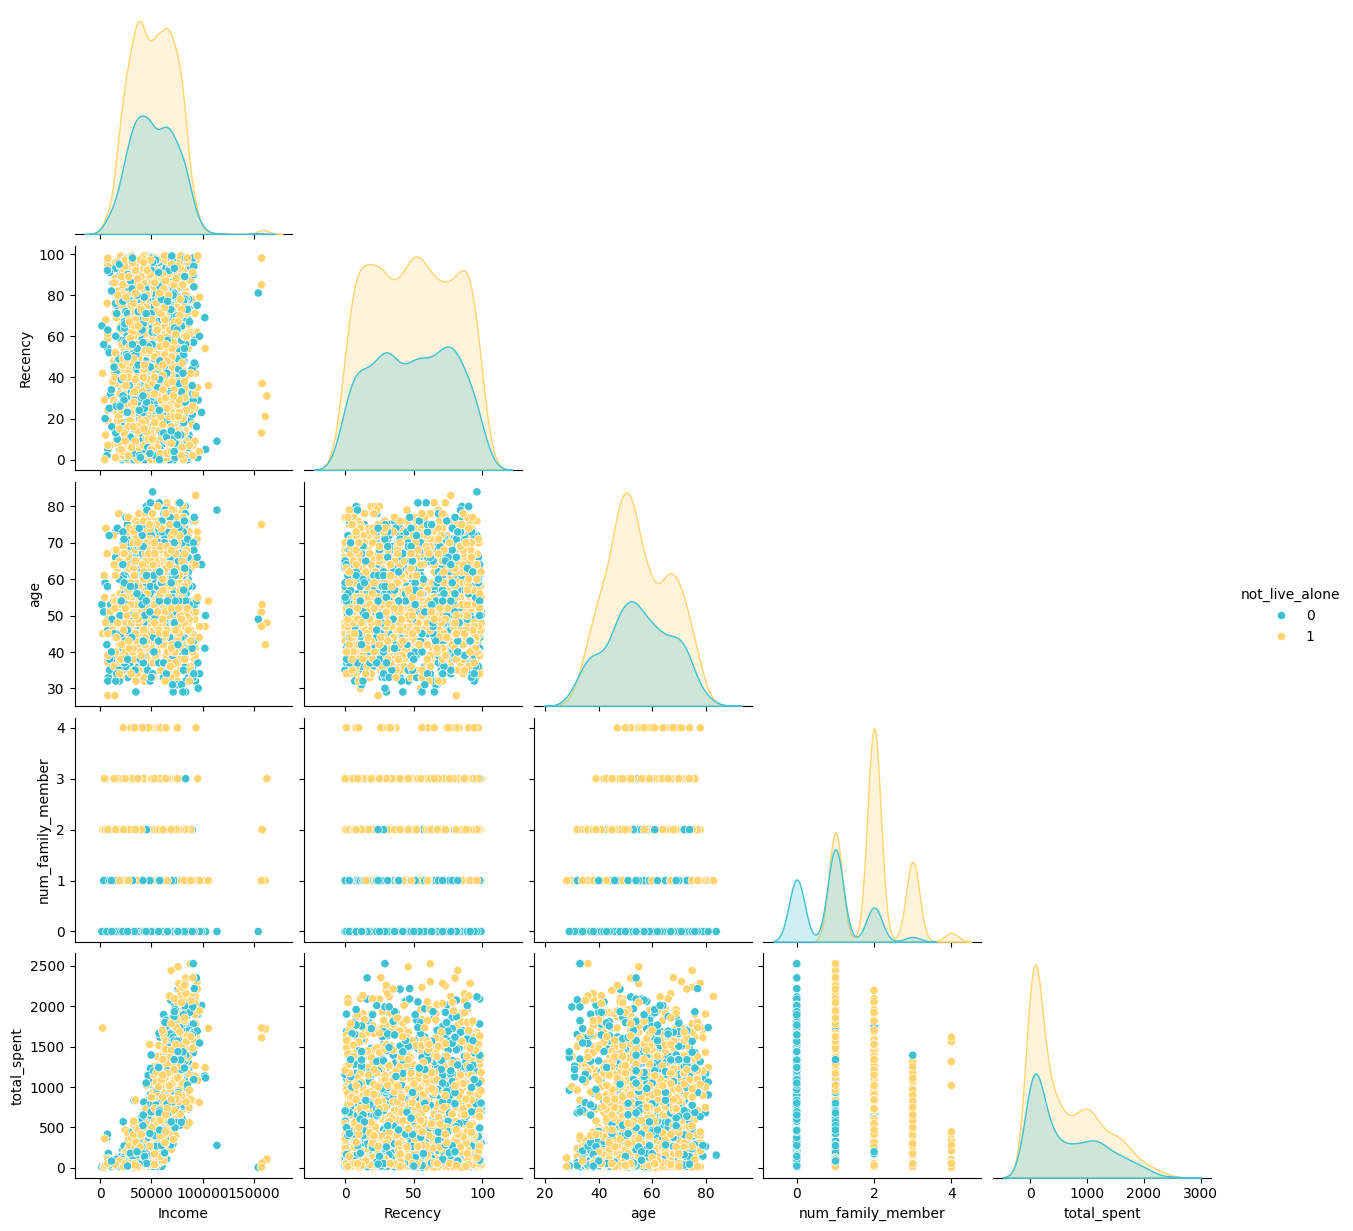

In [72]:
cols_plot_info = ['Income', 'Recency', 'age', 'num_family_member', 'total_spent', 'not_live_alone']

sns.pairplot(data = df_cleaned[cols_plot_info], hue = 'not_live_alone',
             palette = (["#3EC1D3", "#FFD36E"]), corner = True);

**1-2. Customer spent on products with whether the customer is living alone or not.**
- Customer spent columns: `MntWines`, `MntFruits`, `MntMeatProducts`, `MntFishProducts`, `MntSweetProducts`, `MntGoldProds`, `total_spent`
- Living alone or not: `not_live_alone`

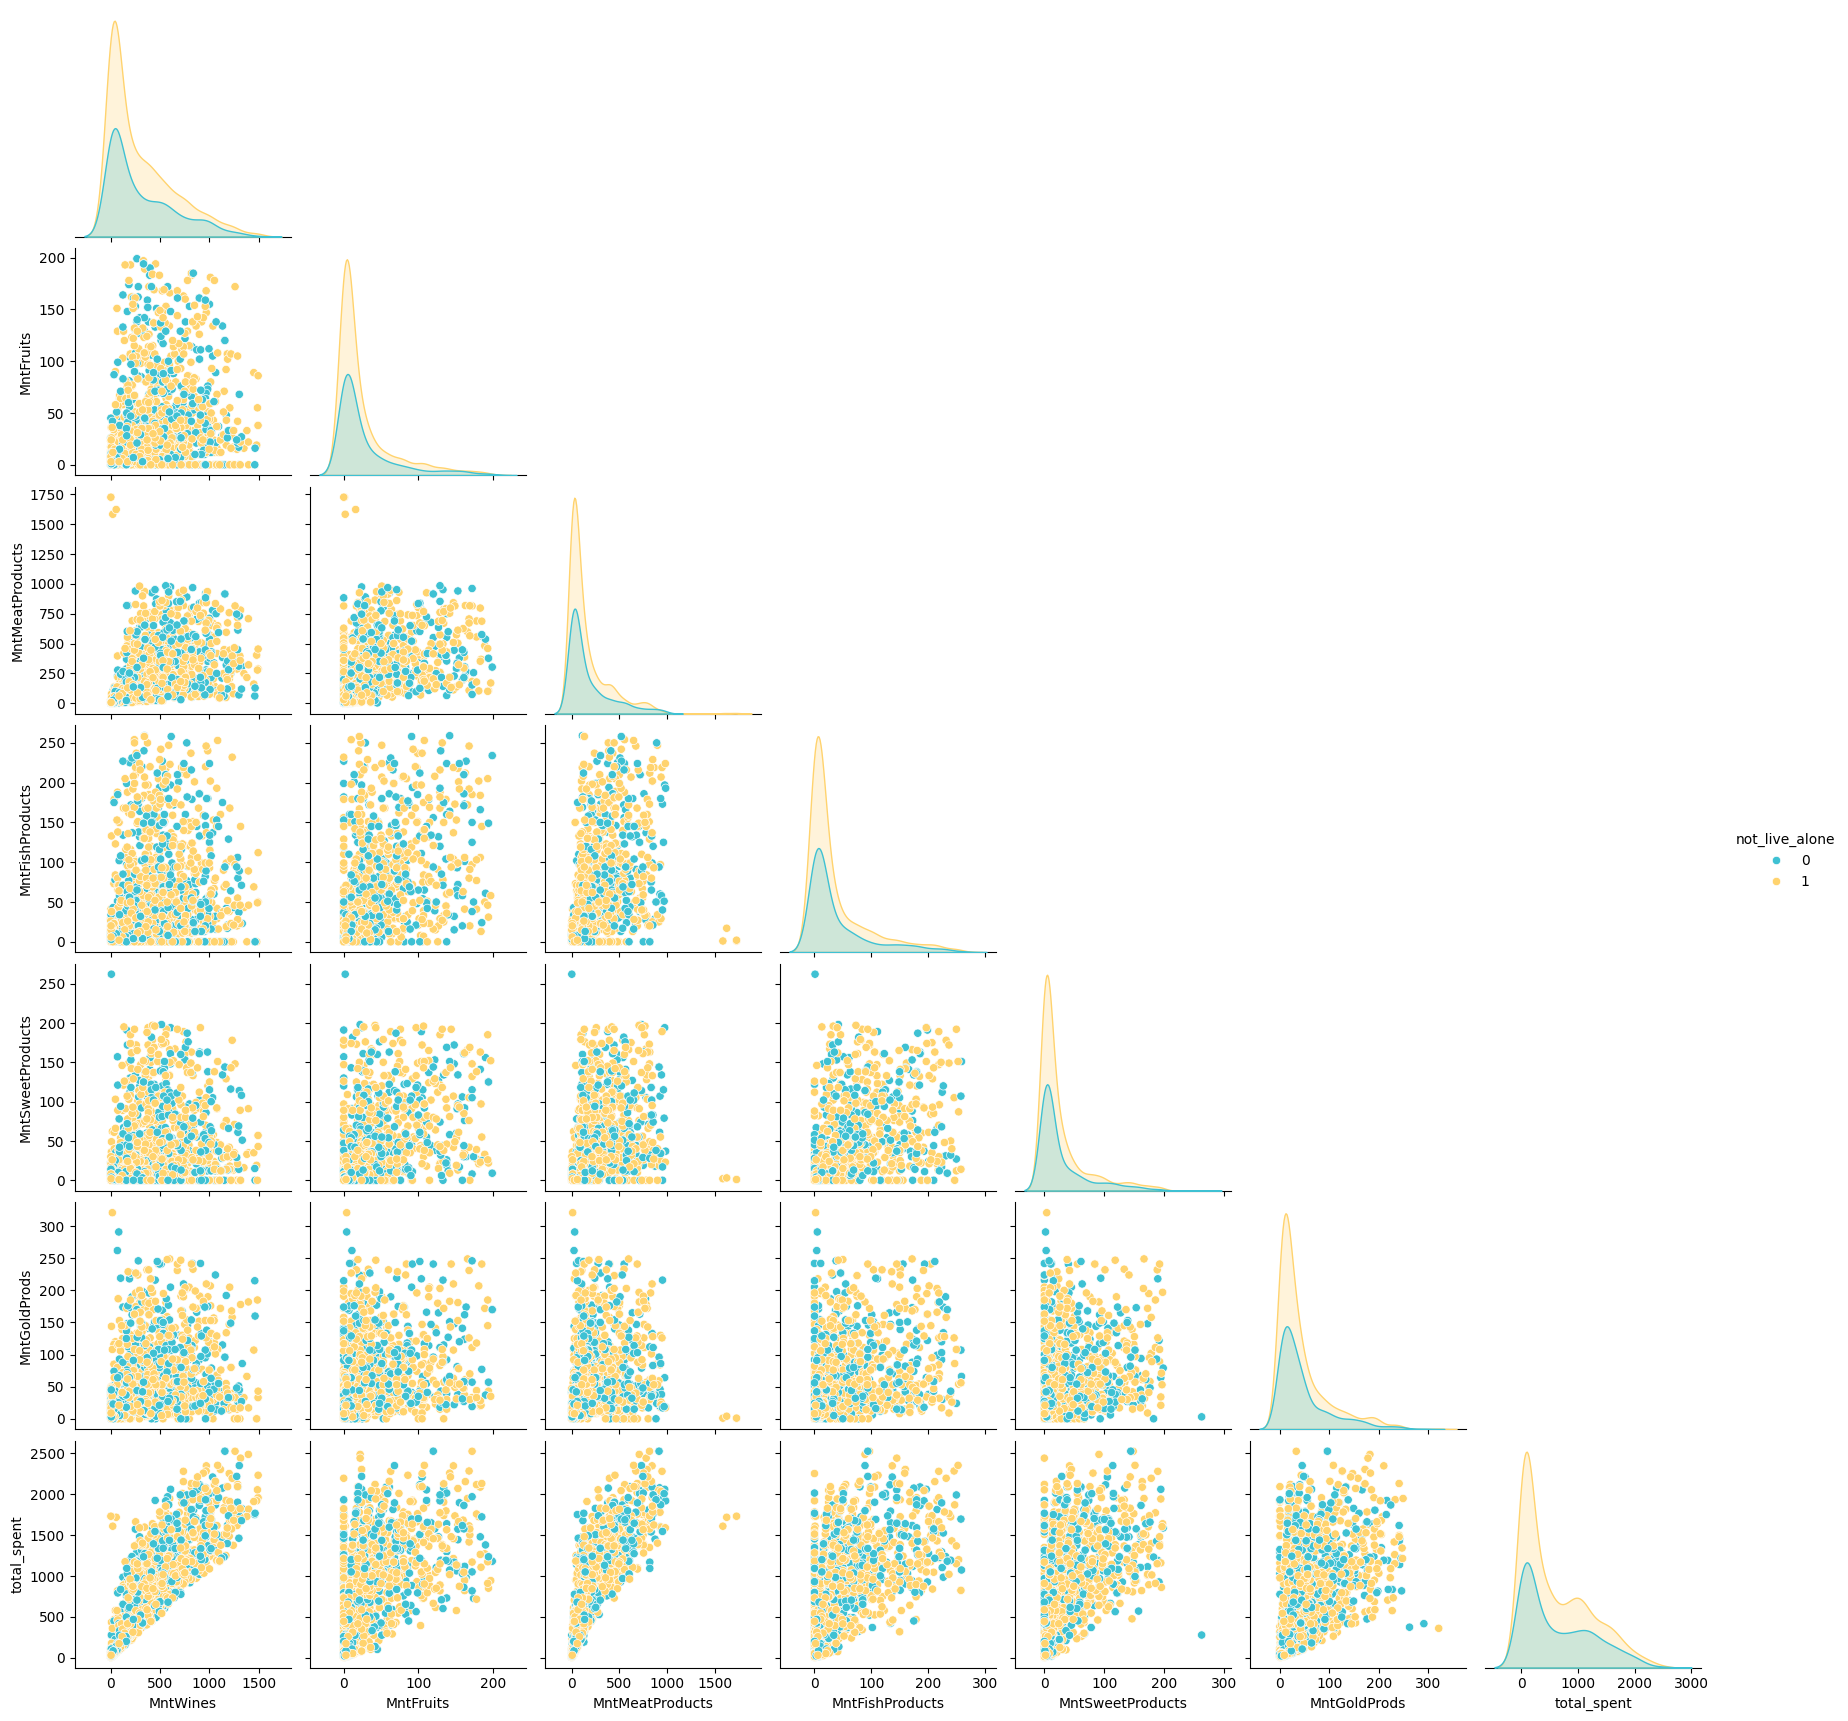

In [74]:
cols_plot_spent = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 
                   'MntSweetProducts', 'MntGoldProds', 'total_spent', 'not_live_alone']

sns.pairplot(data = df_cleaned[cols_plot_spent], hue = 'not_live_alone',
             palette = (["#3EC1D3", "#FFD36E"]), corner = True);

### 2. Pattern differences between customers who has children or not.
**2-1. Customer info related columns with whether the customer has any child.**
- Customer info columns: `Income`, `Recency`, `age`, `num_family_member`, `total_spent`
- Has any child: `has_child`

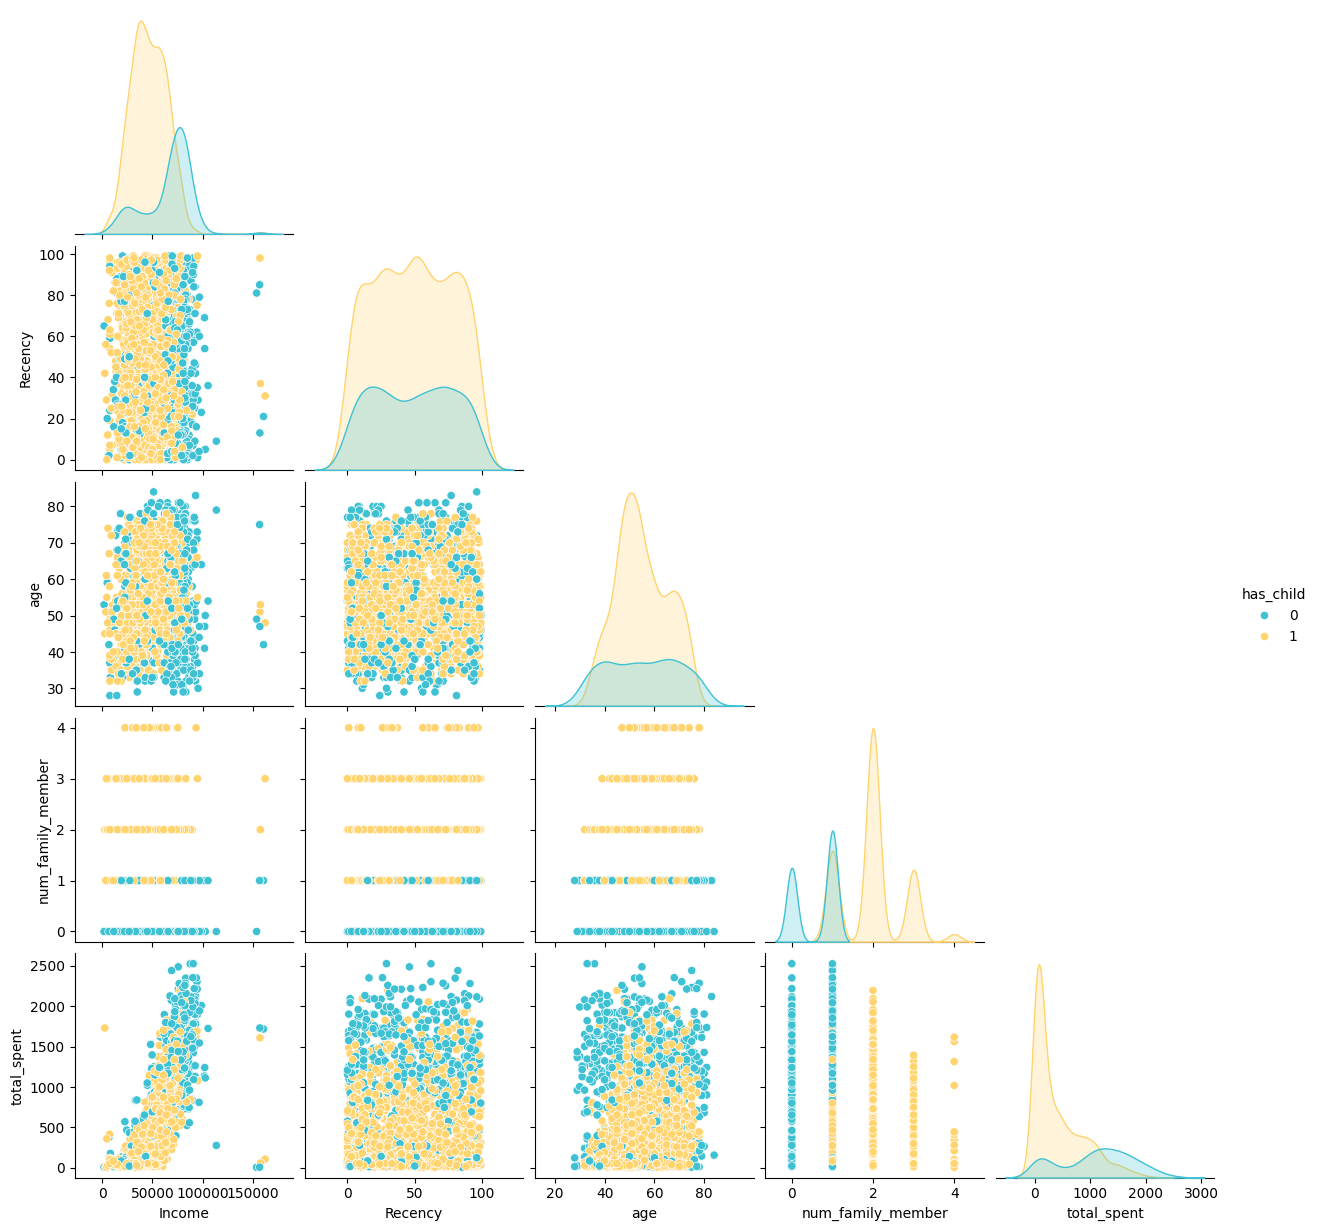

In [75]:
cols_plot_info = ['Income', 'Recency', 'age', 'num_family_member', 'total_spent', 'has_child']

sns.pairplot(data = df_cleaned[cols_plot_info], hue = 'has_child', 
             palette = (["#3EC1D3", "#FFD36E"]), corner = True);

**2-2. Customer spent on products with whether the customer has any child.**
- Customer spent columns: `MntWines`, `MntFruits`, `MntMeatProducts`, `MntFishProducts`, `MntSweetProducts`, `MntGoldProds`, `total_spent`
- Has any child: `has_child`

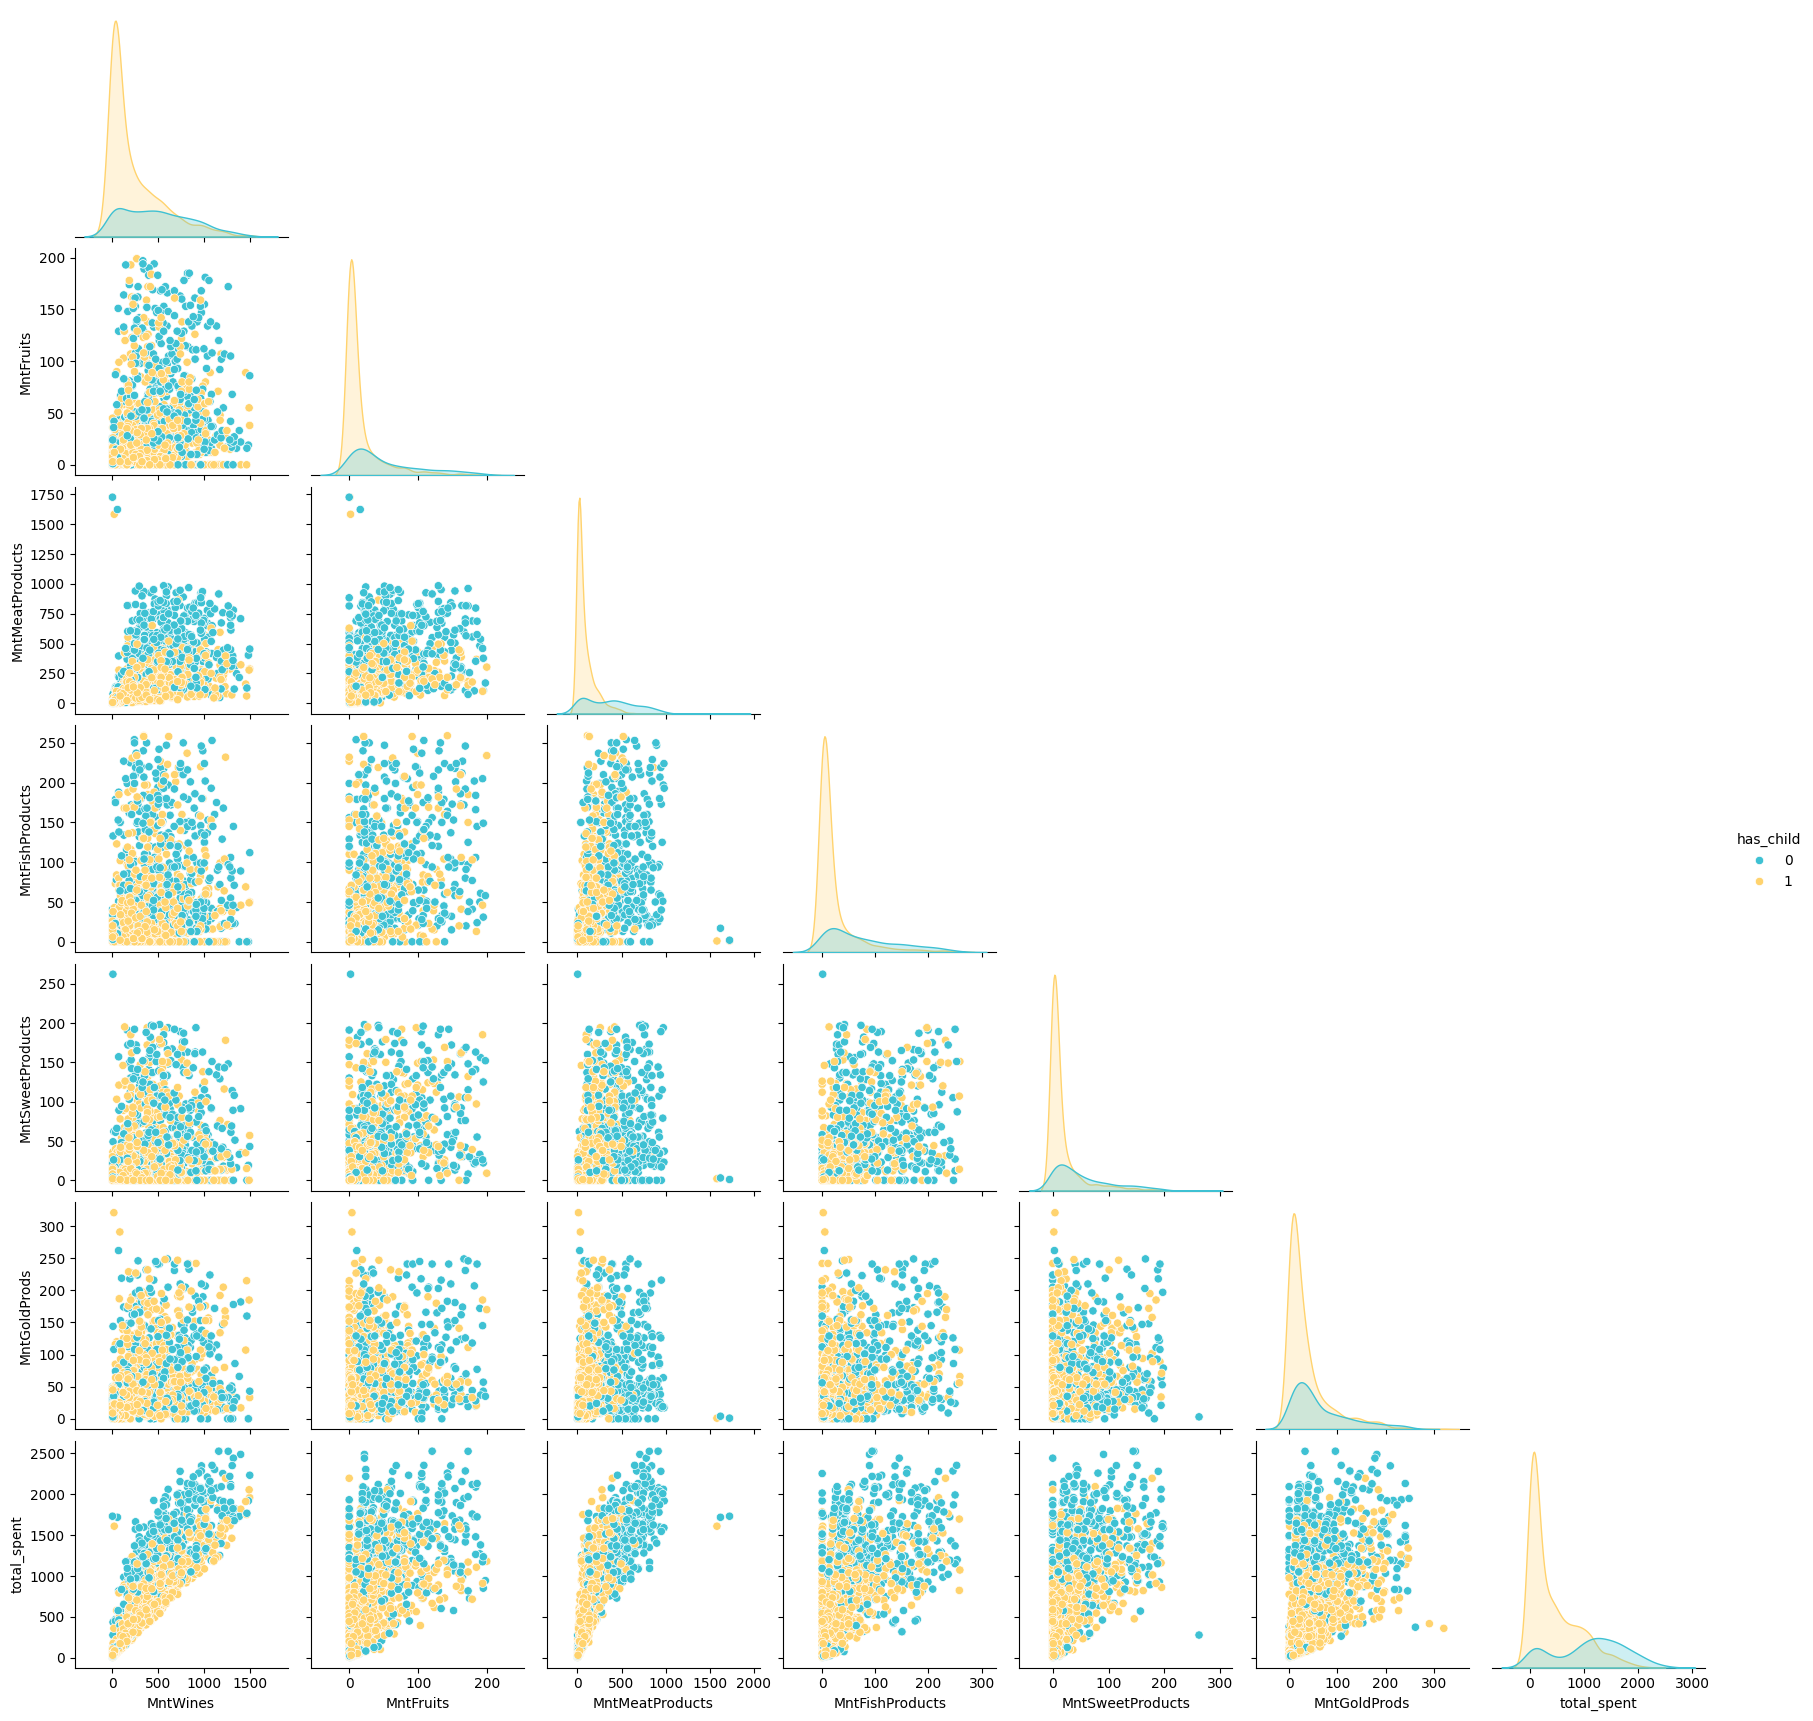

In [76]:
cols_plot_spent = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 
                   'MntSweetProducts', 'MntGoldProds', 'total_spent', 'has_child']

sns.pairplot(data = df_cleaned[cols_plot_spent], hue = 'has_child',
             palette = (["#3EC1D3", "#FFD36E"]), corner = True);

### Output Cleaned Data

In [77]:
df_cleaned.to_csv('../data/cleaned_data.csv', index = False)